In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In this project, I'll use the Zomato API. Since Zomato allows us to get up to 100 restaurants with the maximum 20 restaurnts　per fetch, we will read several json files and combine them to one dataframe. All restaurants are in Chicago area.

In [2]:
df0 = pd.read_json("file0.json", lines=True)
df20 = pd.read_json("file20.json", lines=True)
df40 = pd.read_json("file40.json", lines=True)
df60 = pd.read_json("file60.json", lines=True)
df80 = pd.read_json("file80.json", lines=True)
# df100 = pd.read_json("file100.json", lines=True)
# df120 = pd.read_json("file120.json", lines=True)
# df140 = pd.read_json("file140.json", lines=True)
# df160 = pd.read_json("file160.json", lines=True)
# df180 = pd.read_json("file180.json", lines=True)
# df200 = pd.read_json("file200.json", lines=True)
# df220 = pd.read_json("file220.json", lines=True)
# df240 = pd.read_json("file240.json", lines=True)
# df260 = pd.read_json("file260.json", lines=True)
# df280 = pd.read_json("file280.json", lines=True)

In [3]:
#concat all the json files
# frames = [df0, df20, df40, df60, df80,df100, df120, df140, df160, df180,df200, df220, df240, df260, df280]
frames = [df0, df20, df40, df60, df80]
df = pd.concat(frames, axis=0, ignore_index=True)

In [4]:
df.head(10)

,results_found,results_start,results_shown,restaurants
0,19474,0,20,[{'restaurant': {'R': {'has_menu_status': {'de...
1,19474,20,20,[{'restaurant': {'R': {'has_menu_status': {'de...
2,19474,40,20,[{'restaurant': {'R': {'has_menu_status': {'de...
3,19474,60,20,[{'restaurant': {'R': {'has_menu_status': {'de...
4,19474,80,20,[{'restaurant': {'R': {'has_menu_status': {'de...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
results_found    5 non-null int64
results_start    5 non-null int64
results_shown    5 non-null int64
restaurants      5 non-null object
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [6]:
df.restaurants[0]

[{'restaurant': {'R': {'has_menu_status': {'delivery': -1, 'takeaway': -1},
    'res_id': 16737455},
   'apikey': 'd9fd16b5f1a2bf1d8e26fab89b6c3388',
   'id': '16737455',
   'name': "Portillo's Hot Dogs",
   'url': 'https://www.zomato.com/chicago/portillos-hot-dogs-river-north?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
   'location': {'address': '100 West. Ontario 60610',
    'locality': 'River North',
    'city': 'Chicago',
    'city_id': 292,
    'latitude': '41.8934295000',
    'longitude': '-87.6314147000',
    'zipcode': '60610',
    'country_id': 216,
    'locality_verbose': 'River North, Chicago'},
   'switch_to_order_menu': 0,
   'cuisines': 'American, Italian, Burger, Sandwich',
   'timings': '10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight (Sun)',
   'average_cost_for_two': 30,
   'price_range': 2,
   'currency': '$',
   'highlights': ['Serves Alcohol',
    'Cash',
    'Debit Card',
    'Takeaway Available',
    'Lunch',
    'Credit Card',
    'Dinner',
    'I

We only need "restaurants". We need to normalize the file.

In [7]:
restaurant_df=pd.DataFrame()

for i in range(5):
    restaurant_df =restaurant_df.append(json_normalize(df.restaurants[i]))

In [8]:
pd.set_option('display.max_columns', None)
restaurant_df.head(100)
restaurant_df.reset_index()

,index,restaurant.R.has_menu_status.delivery,restaurant.R.has_menu_status.takeaway,restaurant.R.res_id,restaurant.apikey,restaurant.id,restaurant.name,restaurant.url,restaurant.location.address,restaurant.location.locality,restaurant.location.city,restaurant.location.city_id,restaurant.location.latitude,restaurant.location.longitude,restaurant.location.zipcode,restaurant.location.country_id,restaurant.location.locality_verbose,restaurant.switch_to_order_menu,restaurant.cuisines,restaurant.timings,restaurant.average_cost_for_two,restaurant.price_range,restaurant.currency,restaurant.highlights,restaurant.offers,restaurant.opentable_support,restaurant.is_zomato_book_res,restaurant.mezzo_provider,restaurant.is_book_form_web_view,restaurant.book_form_web_view_url,restaurant.book_again_url,restaurant.thumb,restaurant.user_rating.aggregate_rating,restaurant.user_rating.rating_text,restaurant.user_rating.rating_color,restaurant.user_rating.rating_obj.title.text,restaurant.user_rating.rating_obj.bg_color.type,restaurant.user_rating.rating_obj.bg_color.tint,restaurant.user_rating.votes,restaurant.all_reviews_count,restaurant.photos_url,restaurant.photo_count,restaurant.photos,restaurant.menu_url,restaurant.featured_image,restaurant.has_online_delivery,restaurant.is_delivering_now,restaurant.store_type,restaurant.include_bogo_offers,restaurant.deeplink,restaurant.is_table_reservation_supported,restaurant.has_table_booking,restaurant.events_url,restaurant.phone_numbers,restaurant.all_reviews.reviews,restaurant.establishment,restaurant.establishment_types
0,0,-1,-1,16737455,d9fd16b5f1a2bf1d8e26fab89b6c3388,16737455,Portillo's Hot Dogs,https://www.zomato.com/chicago/portillos-hot-d...,100 West. Ontario 60610,River North,Chicago,292,41.8934295000,-87.6314147000,60610,216,"River North, Chicago",0,"American, Italian, Burger, Sandwich","10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight ...",30,2,$,"[Serves Alcohol, Cash, Debit Card, Takeaway Av...",[],0,0,OTHER,0,,,https://b.zmtcdn.com/data/res_imagery/16737455...,4.9,Excellent,3F7E00,4.9,lime,800,1013,180,https://www.zomato.com/chicago/portillos-hot-d...,3310,"[{'photo': {'id': 'u_1Mzg4NTkyNDUxN', 'url': '...",https://www.zomato.com/chicago/portillos-hot-d...,https://b.zmtcdn.com/data/res_imagery/16737455...,0,0,,True,zomato://restaurant/16737455,0,0,https://www.zomato.com/chicago/portillos-hot-d...,"(312) 587-8910, (312) 587-8910","[{'review': []}, {'review': []}, {'review': []...",[Fast Food],[]
1,1,-1,-1,16752778,d9fd16b5f1a2bf1d8e26fab89b6c3388,16752778,The Purple Pig,https://www.zomato.com/chicago/the-purple-pig-...,"500 N Michigan Avenue, Chicago 60611",Magnificent Mile,Chicago,292,41.8911277778,-87.6248472222,60611,216,"Magnificent Mile, Chicago",0,"Mediterranean, Tapas","11:30 AM to 12 Midnight (Mon, Tue, Wed, Thu, S...",110,4,$,"[Takeaway Available, Lunch, Credit Card, Dinne...",[],0,0,OTHER,0,,,https://b.zmtcdn.com/data/res_imagery/16752778...,4.9,Excellent,3F7E00,4.9,lime,800,966,235,https://www.zomato.com/chicago/the-purple-pig-...,912,"[{'photo': {'id': 'u_zMjMzMzc1NjExM', 'url': '...",https://www.zomato.com/chicago/the-purple-pig-...,https://b.zmtcdn.com/data/res_imagery/16752778...,0,0,,True,zomato://restaurant/16752778,0,0,https://www.zomato.com/chicago/the-purple-pig-...,(312) 464-1744,"[{'review': []}, {'review': []}, {'review': []...",[Casual Dining],[]
2,2,-1,-1,16751896,d9fd16b5f1a2bf1d8e26fab89b6c3388,16751896,Frontera Grill,https://www.zomato.com/chicago/frontera-grill-...,445 North Clark Street 60654,River North,Chicago,292,41.8904333333,-87.6311333333,60654,216,"River North, Chicago",0,Mexican,"Closed (Mon, Sun), 11:30 AM to 2:30 PM, 5:30 P...",80,4,$,"[Credit Card, Takeaway Available, Lunch, Serve...",[],0,0,OTHER,0,,,https://b.zmtcdn.com/data/res_imagery/16751896...,4.6,Excellent,3F7E00,4.6,lime,800,798,136,https://www.zomato.com/chicago/frontera-grill-...,1316,"[{'photo': {'id': 'u_NjAxNzU2OTYwMD', 'url': '...",https://www.zomato.com/chicago/frontera-grill-...,https://b

Now we completed making a proper dataframe. Let's check what's inside.

In [9]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 56 columns):
restaurant.R.has_menu_status.delivery              100 non-null int64
restaurant.R.has_menu_status.takeaway              100 non-null int64
restaurant.R.res_id                                100 non-null int64
restaurant.apikey                                  100 non-null object
restaurant.id                                      100 non-null object
restaurant.name                                    100 non-null object
restaurant.url                                     100 non-null object
restaurant.location.address                        100 non-null object
restaurant.location.locality                       100 non-null object
restaurant.location.city                           100 non-null object
restaurant.location.city_id                        100 non-null int64
restaurant.location.latitude                       100 non-null object
restaurant.location.longitude                   

There is no null value. We will remove unnecessary columns such as photos, url, phone numbers.

In [10]:
new_df=restaurant_df.drop(columns=["restaurant.id",
                                   "restaurant.apikey",
                                   "restaurant.url",
                                   "restaurant.is_zomato_book_res",
                                   "restaurant.book_form_web_view_url",
                                   "restaurant.R.res_id",
                                   "restaurant.location.city_id",
                                   "restaurant.location.city",
                                   "restaurant.photos_url", 
                                   "restaurant.photo_count",
                                   "restaurant.currency",
                                   "restaurant.photos",
                                   "restaurant.book_again_url",
                                   "restaurant.mezzo_provider",
                                   "restaurant.menu_url",
                                   "restaurant.events_url", 
                                   "restaurant.offers",
                                   "restaurant.opentable_support",
                                   "restaurant.phone_numbers",
                                   "restaurant.user_rating.rating_color",
                                   "restaurant.user_rating.rating_obj.bg_color.type",
                                   "restaurant.user_rating.rating_obj.bg_color.tint",
                                   "restaurant.deeplink",
                                   "restaurant.user_rating.rating_text",
                                   "restaurant.establishment_types",
                                   "restaurant.switch_to_order_menu",
                                   "restaurant.is_book_form_web_view",
                                   "restaurant.user_rating.rating_obj.title.text",
                                   "restaurant.featured_image",
                                   "restaurant.has_online_delivery",
                                   "restaurant.is_delivering_now",
                                   "restaurant.is_table_reservation_supported",
                                   "restaurant.location.locality_verbose",
                                   "restaurant.is_delivering_now",
                                   "restaurant.thumb",
                                   "restaurant.store_type",
                                   "restaurant.has_table_booking",
                                   "restaurant.location.country_id",
                                   "restaurant.R.has_menu_status.takeaway",
                                   "restaurant.R.has_menu_status.delivery",
                                   "restaurant.include_bogo_offers",
                                   "restaurant.all_reviews.reviews"])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 19
Data columns (total 15 columns):
restaurant.name                            100 non-null object
restaurant.location.address                100 non-null object
restaurant.location.locality               100 non-null object
restaurant.location.latitude               100 non-null object
restaurant.location.longitude              100 non-null object
restaurant.location.zipcode                100 non-null object
restaurant.cuisines                        100 non-null object
restaurant.timings                         100 non-null object
restaurant.average_cost_for_two            100 non-null int64
restaurant.price_range                     100 non-null int64
restaurant.highlights                      100 non-null object
restaurant.user_rating.aggregate_rating    100 non-null object
restaurant.user_rating.votes               100 non-null object
restaurant.all_reviews_count               100 non-null int64
restaurant.establ

In [11]:
new_df.reset_index(drop=True, inplace=True)

In [12]:
new_df.head(100)

,restaurant.name,restaurant.location.address,restaurant.location.locality,restaurant.location.latitude,restaurant.location.longitude,restaurant.location.zipcode,restaurant.cuisines,restaurant.timings,restaurant.average_cost_for_two,restaurant.price_range,restaurant.highlights,restaurant.user_rating.aggregate_rating,restaurant.user_rating.votes,restaurant.all_reviews_count,restaurant.establishment
0,Portillo's Hot Dogs,100 West. Ontario 60610,River North,41.8934295000,-87.6314147000,60610,"American, Italian, Burger, Sandwich","10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight ...",30,2,"[Serves Alcohol, Cash, Debit Card, Takeaway Av...",4.9,1013,180,[Fast Food]
1,The Purple Pig,"500 N Michigan Avenue, Chicago 60611",Magnificent Mile,41.8911277778,-87.6248472222,60611,"Mediterranean, Tapas","11:30 AM to 12 Midnight (Mon, Tue, Wed, Thu, S...",110,4,"[Takeaway Available, Lunch, Credit Card, Dinne...",4.9,966,235,[Casual Dining]
2,Frontera Grill,445 North Clark Street 60654,River North,41.8904333333,-87.6311333333,60654,Mexican,"Closed (Mon, Sun), 11:30 AM to 2:30 PM, 5:30 P...",80,4,"[Credit Card, Takeaway Available, Lunch, Serve...",4.6,798,136,[Casual Dining]
3,Grand Lux Cafe,600 N Michigan Avenue 60611,River North,41.8935805556,-87.6251138889,60611,"American, Pizza, Burger, Sandwich","11 AM to 11:30 PM (Mon-Thu),11 AM to 12:30 AM ...",55,3,"[Serves Alcohol, Cash, Lunch, Credit Card, Tak...",4.6,799,112,[Casual Dining]
4,Lou Malnati's Pizzeria,439 N Wells Street 60654,River North,41.8903810000,-87.6340240000,60654,Pizza,"11 AM to 11 PM (Mon, Tue, Wed, Thu, Sun), 11 A...",40,2,"[Cash, Takeaway Available, Lunch, Serves Alcoh...",4.6,786,168,[Casual Dining]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sultan's Market,"2057 West North Avenue, Wicker Park 60647",Wicker Park,41.9103600000,-87.6790500000,60647,Middle Eastern,"10 AM to 10 PM (Mon-Sat), 10 AM to 9 PM (Sun)",25,2,"[Cash, Debit Card, Delivery, Dinner, Credit Ca...",4.5,254,18,[Casual Dining]
96,312 Chicago,136 North La Salle Street 60602,Loop,41.8843175461,-87.6328124106,60602,Italian,"7 AM to 2:30 PM, 5 PM to 9:30 PM (Mon), 7 AM t...",80,4,"[Dinner, Credit Card, Takeaway Available, Brea...",3.7,60,17,[Casual Dining]
97,Heaven on Seven,"Garland Building, 111 N Wabash Avenue, 7th Flo...",Loop,41.8835690000,-87.6260150000,60602,"Cajun, Southern","10 AM to 4 PM (Mon-Wed),10 AM to 4 PM, 5:30 PM...",35,2,"[Cash, Breakfast, Dinner, Credit Card, Takeawa...",4.3,227,36,[Casual Dining]
98,Twin Anchors Restaurant & Tavern,"1655 North Sedgwick Street, Old Town 60614",Lincoln Park,41.9125200000,-87.6385400000,60614,"American, BBQ","5 PM to 10:30 PM (Mon-Tue), 5 PM to 11 PM (Wed...",50,3,"[Cash, Serves Alcohol, Credit Card, Takeaway A...",4.5,228,35,[Bar]


## Basic data analysis

Which area has the most restaurants in Chicago?

Text(0.5, 0, 'Number of restaurants')

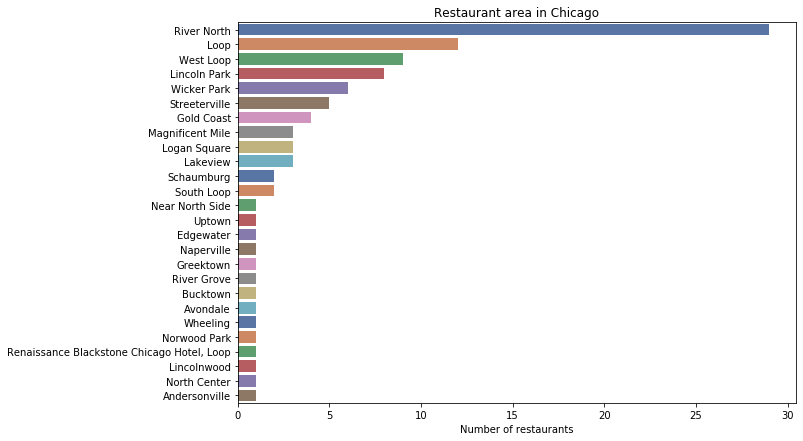

In [13]:
plt.figure(figsize=(10, 7))
areas=new_df["restaurant.location.locality"].value_counts()
sns.barplot(x=areas, y=areas.index, palette="deep")
plt.title("Restaurant area in Chicago")
plt.xlabel("Number of restaurants")

- As you can see River North has the most restaurants. Then Loop, West Loop and Lincoln Park follow.
- I'm living in Chicago and this data makes sense.

### below are test for showing restaurats locations on the map. Since the data is not accurate, it looks crazy, but it is working. I'll work on this in the future when I got accurate data with my business.

In [14]:
# # Extracting location information using Geopy
# from geopy.geocoders import Nominatim
# from folium.plugins import HeatMap
# import folium
# from tqdm import tqdm

In [15]:
# locations=pd.DataFrame({"Name":new_df['restaurant.location.locality'].unique()})
# locations['Name']=locations['Name'].apply(lambda x: str(x))
# lat_lon=[]
# geolocator=Nominatim(user_agent="app")
# for location in locations['Name']:
#     location = geolocator.geocode(location)
#     if location is None:
#         lat_lon.append(np.nan)
#     else:    
#         geo=(location.latitude,location.longitude)
#         lat_lon.append(geo)


# locations['geo_loc']=lat_lon
# locations.to_csv('locations.csv',index=False)

In [16]:
# locations

In [17]:
# locations = locations.drop(locations.index[12])
# locations

We have found out latitude and longitude of each location listed in the dataset using geopy.
This is used to plot maps.

In [18]:
# Rest_locations=pd.DataFrame(new_df['restaurant.location.locality'].value_counts().reset_index())
# Rest_locations.columns=['Name','count']
# Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
# Rest_locations['count'].max()

In [19]:
# def generateBaseMap(default_location=[41.87, 87.62], default_zoom_start=12):
#     base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
#     return base_map

In [20]:
# lat,lon=zip(*np.array(Rest_locations['geo_loc']))
# Rest_locations['lat']=lat
# Rest_locations['lon']=lon
# basemap=generateBaseMap()
# HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [21]:
# basemap

### ↑ test done. As you can see, some of the latitude and the longitute are not accurate.

Next, let's check what kind of cuisine is popular in Chicago.

Text(0.5, 0, 'Number of restaurants')

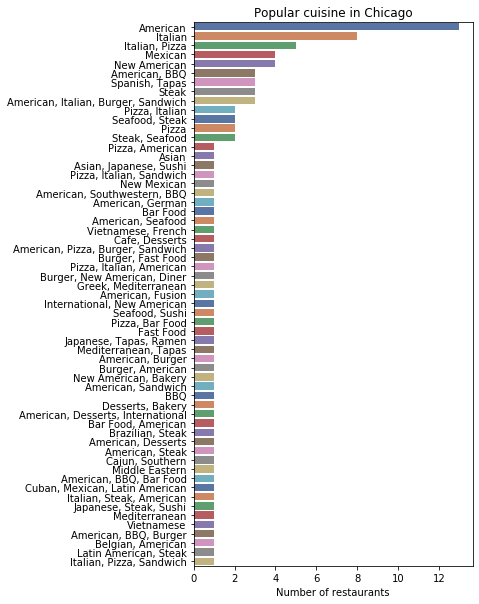

In [22]:
plt.figure(figsize=(5, 10))

cuisines=new_df["restaurant.cuisines"].value_counts()
sns.barplot(x=cuisines, y=cuisines.index, palette="deep")

plt.title("Popular cuisine in Chicago")
plt.xlabel("Number of restaurants")

As you can see, there are many overlap in the list. We need to clean up this.

In [23]:
new_df["restaurant.cuisines"] = new_df["restaurant.cuisines"].str.strip()
new_df["restaurant.cuisines"].value_counts()

American                               13
Italian                                 8
Italian, Pizza                          5
Mexican                                 4
New American                            4
American, BBQ                           3
Spanish, Tapas                          3
Steak                                   3
American, Italian, Burger, Sandwich     3
Pizza, Italian                          2
Seafood, Steak                          2
Pizza                                   2
Steak, Seafood                          2
Pizza, American                         1
Asian                                   1
Asian, Japanese, Sushi                  1
Pizza, Italian, Sandwich                1
New Mexican                             1
American, Southwestern, BBQ             1
American, German                        1
Bar Food                                1
American, Seafood                       1
Vietnamese, French                      1
Cafe, Desserts                    

In [24]:
import re

for i in range(new_df.index.size):
    if re.match('.*Burger.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Burger"
        
for i in range(new_df.index.size):
    if re.match('.*Fast Food.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Burger"
        
for i in range(new_df.index.size):
    if re.match('.*Japanese.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Japanese"
        
for i in range(new_df.index.size):
    if re.match('.*Sushi.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Japanese"
        
for i in range(new_df.index.size):
    if re.match('.*Pizza.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Pizza"
        
for i in range(new_df.index.size):
    if re.match('.*Mediterranean.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mediterranean"
        
for i in range(new_df.index.size):
    if re.match('.*Spanish.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mediterranean"

for i in range(new_df.index.size):
    if re.match('.*BBQ.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Steak"
        
for i in range(new_df.index.size):
    if re.match('.*Steak.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Steak"
        
for i in range(new_df.index.size):
    if re.match('.*Latin American.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Latin American"
        
for i in range(new_df.index.size):
    if re.match('.*Seafood.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Seafood"
        
for i in range(new_df.index.size):
    if re.match('.*Bar Food.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Bar Food"
        
for i in range(new_df.index.size):
    if re.match('.*Bakery.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Bakery"
        
for i in range(new_df.index.size):
    if re.match('.*Vietnamese.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Asian"
        
for i in range(new_df.index.size):
    if re.match('.*Italian.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Italian"
        
for i in range(new_df.index.size):
    if re.match('.*Desserts.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Desserts"
        
for i in range(new_df.index.size):
    if re.match('.*New Mexican.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mexican"
        
for i in range(new_df.index.size):
    if re.match('.*Latin American.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "Mexican"
        
for i in range(new_df.index.size):
    if re.match('.*American.*', str(new_df.loc[i, 'restaurant.cuisines'])):
        new_df.loc[i, 'restaurant.cuisines'] = "American"
        
new_df["restaurant.cuisines"].value_counts()

American           22
Steak              17
Pizza              14
Burger             10
Italian             8
Mediterranean       6
Mexican             6
Japanese            4
Asian               3
Desserts            3
Bakery              2
Bar Food            2
Seafood             1
Cajun, Southern     1
Middle Eastern      1
Name: restaurant.cuisines, dtype: int64

Text(0.5, 0, 'Number of restaurants')

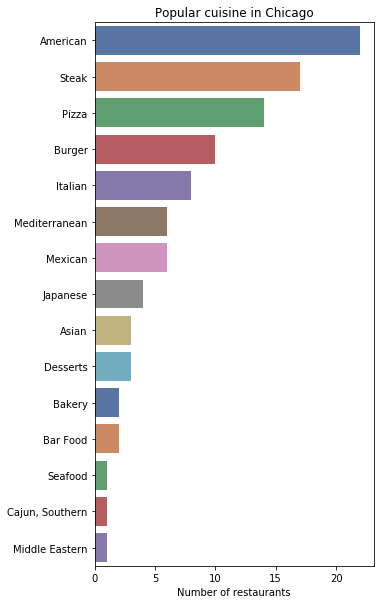

In [25]:
plt.figure(figsize=(5, 10))

cuisines=new_df["restaurant.cuisines"].value_counts()
sns.barplot(x=cuisines, y=cuisines.index, palette="deep")

plt.title("Popular cuisine in Chicago")
plt.xlabel("Number of restaurants")

As you can see,  American and Italian are popular cuisines in Chicago.

In [26]:
japanese=new_df[new_df['restaurant.cuisines']=='Japanese']
japanese

,restaurant.name,restaurant.location.address,restaurant.location.locality,restaurant.location.latitude,restaurant.location.longitude,restaurant.location.zipcode,restaurant.cuisines,restaurant.timings,restaurant.average_cost_for_two,restaurant.price_range,restaurant.highlights,restaurant.user_rating.aggregate_rating,restaurant.user_rating.votes,restaurant.all_reviews_count,restaurant.establishment
22,Shaw's Crab House,"21 East Hubbard Street, Streeterville 60611",River North,41.8899800000,-87.6271700000,60611,Japanese,"11:30 AM to 10 PM (Mon-Thu), 11:30 AM to 11 PM...",110,4,"[Cash, Debit Card, Dinner, Credit Card, Takeaw...",4.6,385,58,[Casual Dining]
82,Slurping Turtle,116 West Hubbard Street 60654,River North,41.8899694444,-87.6320194444,60654,Japanese,"11:30 AM to 3 PM, 5 PM to 10 PM (Mon-Thu),11:3...",70,3,"[Credit Card, Takeaway Available, Lunch, Deliv...",4.1,164,45,[Casual Dining]
92,Coast Sushi,"2045 N Damen Avenue, Chicago 60647",Bucktown,41.9190690000,-87.6775510000,60647,Japanese,"4 PM to 11 PM (Mon),4 PM to 12 Midnight (Tue-F...",45,3,"[Cash, Takeaway Available, Credit Card, Delive...",4.5,264,21,[Casual Dining]
94,Roka Akor - Chicago,456 North Clark Street 60654,River North,41.8905800000,-87.6310930000,60654,Japanese,"11:30 AM to 2:30 PM, 5 PM to 11 PM (Mon, Tue, ...",100,4,"[Credit Card, Takeaway Available, Dinner, Lunc...",4.0,62,21,[Fine Dining]


Most of Japanese restaurants located in River North.

Next, we will check what kind of establishment is popular in Chicago. But, first of all, we need to change it from object to string.

In [27]:
new_df['restaurant.establishment'] = new_df['restaurant.establishment'].astype(str)


for i in range(new_df.index.size):
    if new_df['restaurant.establishment'][i]=="['Fast Food']":
        new_df.loc[i, 'restaurant.establishment'] = "Fast Food"
        
    if new_df['restaurant.establishment'][i]=="['Casual Dining']":
        new_df.loc[i, 'restaurant.establishment'] = "Casual Dining"
        
    if new_df['restaurant.establishment'][i]=="['Fine Dining']":
        new_df.loc[i, 'restaurant.establishment'] = "Fine Dining"
        
    if new_df['restaurant.establishment'][i]=="['Pizzeria']":
        new_df.loc[i, 'restaurant.establishment'] = "Pizzeria"
        
    if new_df['restaurant.establishment'][i]=="['Bar']":
        new_df.loc[i, 'restaurant.establishment'] = "Bar"
        
    if new_df['restaurant.establishment'][i]=="['Diner']":
        new_df.loc[i, 'restaurant.establishment'] = "Diner"
        
    if new_df['restaurant.establishment'][i]=="['Café']":
        new_df.loc[i, 'restaurant.establishment'] = 'Café'
        
    if new_df['restaurant.establishment'][i]=="['Microbrewery']":
        new_df.loc[i, 'restaurant.establishment'] = "Microbrewery"
        
    if new_df['restaurant.establishment'][i]=="['Food Court']":
        new_df.loc[i, 'restaurant.establishment'] = "Food Court"
        
    if new_df['restaurant.establishment'][i]=="['Fast Casual']":
        new_df.loc[i, 'restaurant.establishment'] = 'Fast Casual'
        
    if new_df['restaurant.establishment'][i]=="['Bakery']":
        new_df.loc[i, 'restaurant.establishment'] = "Bakery"

Text(0.5, 0, 'Number of restaurants')

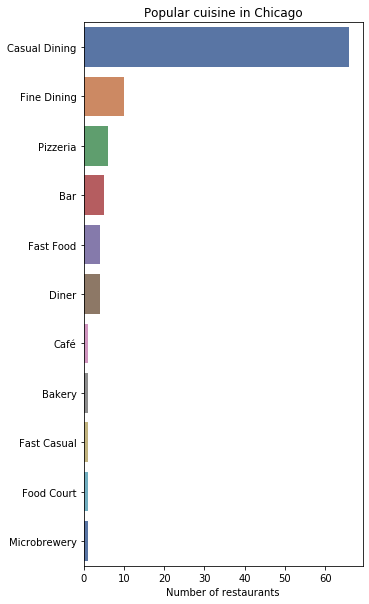

In [28]:
plt.figure(figsize=(5, 10))

establishment=new_df["restaurant.establishment"].value_counts()
sns.barplot(x=establishment, y=establishment.index, palette="deep")

plt.title("Popular cuisine in Chicago")
plt.xlabel("Number of restaurants")

Casual Dining are the most popular restaurant establishment in Chicago.

(array([ 2.,  0.,  1.,  0.,  3., 20.,  7.,  6., 10.,  5.,  9.,  5.,  4.,
         6.,  3.,  1.,  7.,  0.,  4.,  0.,  1.,  3.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.,   6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.,
         66.,  72.,  78.,  84.,  90.,  96., 102., 108., 114., 120., 126.,
        132., 138., 144., 150., 156., 162., 168., 174., 180., 186., 192.,
        198., 204., 210., 216., 222., 228., 234., 240., 246., 252., 258.,
        264., 270., 276., 282., 288., 294., 300., 306., 312., 318., 324.,
        330., 336., 342., 348., 354., 360., 366., 372., 378., 38

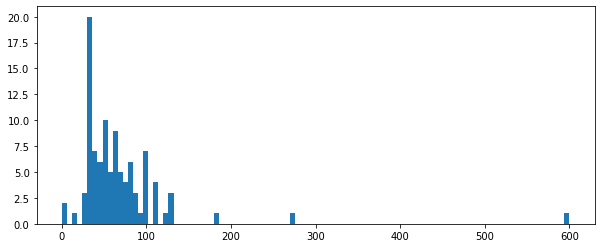

In [29]:
plt.figure(figsize=(10, 4))
costs=new_df["restaurant.average_cost_for_two"]
plt.hist(costs, bins=100)

It look like most of the costs are under $100.

(array([ 3.,  0.,  0., 30.,  0.,  0., 35.,  0.,  0., 32.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

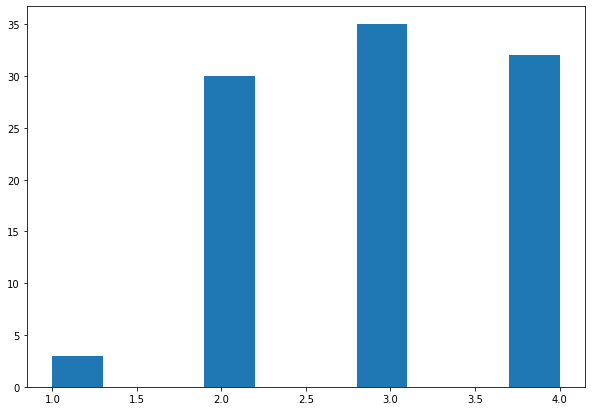

In [30]:
plt.figure(figsize=(10, 7))
costs=new_df["restaurant.price_range"]
plt.hist(costs)

(array([ 9., 15.,  6., 18.,  9.,  9., 11., 11.,  8.,  4.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

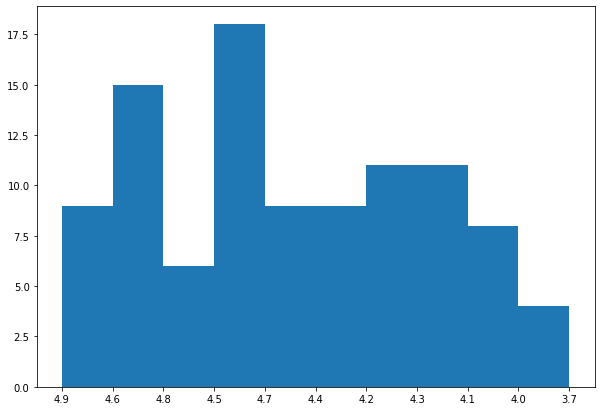

In [31]:
plt.figure(figsize=(10, 7))
ratings=new_df["restaurant.user_rating.aggregate_rating"]
plt.hist(ratings)

Since our dataset dosen't have enough data, let's make the aggregate_rating binary. We'll set above 4.7 to be 1, and the less than 4.7 to be 0.

In [32]:
for i in range(new_df.index.size):
    if float(new_df['restaurant.user_rating.aggregate_rating'][i])>=4.7:
        new_df.loc[i, "restaurant.user_rating.aggregate_rating"] = 1
    else:
        new_df.loc[i, "restaurant.user_rating.aggregate_rating"] = 0
        
new_df["restaurant.user_rating.aggregate_rating"]

0     1
1     1
2     0
3     0
4     0
     ..
95    0
96    0
97    0
98    0
99    0
Name: restaurant.user_rating.aggregate_rating, Length: 100, dtype: int64

In [33]:
binary_ratings=new_df["restaurant.user_rating.aggregate_rating"].value_counts()
binary_ratings

0    76
1    24
Name: restaurant.user_rating.aggregate_rating, dtype: int64

24% of the restaurants have above 4.7 ratings.

In [34]:
# Before moving on, we need to solve class imbalance. Since we have only 100 data, we will upsample the high rated restaurants.

# Lets shuffle the data before creating the subsamples
new_df = new_df.sample(frac=1)

low_rating_df = new_df.loc[new_df["restaurant.user_rating.aggregate_rating"] == 0]
high_rating_df = new_df.loc[new_df["restaurant.user_rating.aggregate_rating"] == 1]

# difference is 76-24 =52. We will add 52 high rated restaruants
new_df = new_df.sample(frac=1)
upsample_high_rating_df = new_df.loc[new_df["restaurant.user_rating.aggregate_rating"] == 1]

new_df = new_df.sample(frac=1)
upsample_high_rating_df2 = new_df.loc[new_df["restaurant.user_rating.aggregate_rating"] == 1]

new_df = new_df.sample(frac=1)
upsample_high_rating_df4 = new_df.loc[new_df["restaurant.user_rating.aggregate_rating"] == 1][:4]


normal_distributed_df = pd.concat([upsample_high_rating_df, upsample_high_rating_df2, upsample_high_rating_df4, high_rating_df, low_rating_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

binary_ratings=new_df["restaurant.user_rating.aggregate_rating"].value_counts()
binary_ratings

### As a next step, we will make a supervised learning model. Before moving on, we need to work on one hot encoding for categorical variables. 

In [35]:
#Let's check which is categorical values.
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
restaurant.name                            100 non-null object
restaurant.location.address                100 non-null object
restaurant.location.locality               100 non-null object
restaurant.location.latitude               100 non-null object
restaurant.location.longitude              100 non-null object
restaurant.location.zipcode                100 non-null object
restaurant.cuisines                        100 non-null object
restaurant.timings                         100 non-null object
restaurant.average_cost_for_two            100 non-null int64
restaurant.price_range                     100 non-null int64
restaurant.highlights                      100 non-null object
restaurant.user_rating.aggregate_rating    100 non-null int64
restaurant.user_rating.votes               100 non-null object
restaurant.all_reviews_count               100 non-null int64
restaurant.establi

In [36]:
new_df.head(5)

,restaurant.name,restaurant.location.address,restaurant.location.locality,restaurant.location.latitude,restaurant.location.longitude,restaurant.location.zipcode,restaurant.cuisines,restaurant.timings,restaurant.average_cost_for_two,restaurant.price_range,restaurant.highlights,restaurant.user_rating.aggregate_rating,restaurant.user_rating.votes,restaurant.all_reviews_count,restaurant.establishment
0,Portillo's Hot Dogs,100 West. Ontario 60610,River North,41.8934295000,-87.6314147000,60610,Burger,"10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight ...",30,2,"[Serves Alcohol, Cash, Debit Card, Takeaway Av...",1,1013,180,Fast Food
1,The Purple Pig,"500 N Michigan Avenue, Chicago 60611",Magnificent Mile,41.8911277778,-87.6248472222,60611,Mediterranean,"11:30 AM to 12 Midnight (Mon, Tue, Wed, Thu, S...",110,4,"[Takeaway Available, Lunch, Credit Card, Dinne...",1,966,235,Casual Dining
2,Frontera Grill,445 North Clark Street 60654,River North,41.8904333333,-87.6311333333,60654,Mexican,"Closed (Mon, Sun), 11:30 AM to 2:30 PM, 5:30 P...",80,4,"[Credit Card, Takeaway Available, Lunch, Serve...",0,798,136,Casual Dining
3,Grand Lux Cafe,600 N Michigan Avenue 60611,River North,41.8935805556,-87.6251138889,60611,Burger,"11 AM to 11:30 PM (Mon-Thu),11 AM to 12:30 AM ...",55,3,"[Serves Alcohol, Cash, Lunch, Credit Card, Tak...",0,799,112,Casual Dining
4,Lou Malnati's Pizzeria,439 N Wells Street 60654,River North,41.8903810000,-87.6340240000,60654,Pizza,"11 AM to 11 PM (Mon, Tue, Wed, Thu, Sun), 11 A...",40,2,"[Cash, Takeaway Available, Lunch, Serves Alcoh...",0,786,168,Casual Dining


We will use the below features for the model.
 - restaurant.location.locality
 - restaurant.cuisines
 - restaurant.average_cost_for_two
 - restaurant.user_rating.votes
 - restaurant.all_reviews_count
 - restaurant.establishment

In [37]:
#work on restaurant.location.locality, restaurant.cuisines, restaurant.establishment
new_df = pd.concat([new_df, pd.get_dummies(new_df["restaurant.location.locality"])], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df["restaurant.cuisines"])], axis=1)
new_df = pd.concat([new_df, pd.get_dummies(new_df["restaurant.establishment"])], axis=1)
new_df

,restaurant.name,restaurant.location.address,restaurant.location.locality,restaurant.location.latitude,restaurant.location.longitude,restaurant.location.zipcode,restaurant.cuisines,restaurant.timings,restaurant.average_cost_for_two,restaurant.price_range,restaurant.highlights,restaurant.user_rating.aggregate_rating,restaurant.user_rating.votes,restaurant.all_reviews_count,restaurant.establishment,Andersonville,Avondale,Bucktown,Edgewater,Gold Coast,Greektown,Lakeview,Lincoln Park,Lincolnwood,Logan Square,Loop,Magnificent Mile,Naperville,Near North Side,North Center,Norwood Park,"Renaissance Blackstone Chicago Hotel, Loop",River Grove,River North,Schaumburg,South Loop,Streeterville,Uptown,West Loop,Wheeling,Wicker Park,American,Asian,Bakery,Bar Food,Burger,"Cajun, Southern",Desserts,Italian,Japanese,Mediterranean,Mexican,Middle Eastern,Pizza,Seafood,Steak,Bakery,Bar,Café,Casual Dining,Diner,Fast Casual,Fast Food,Fine Dining,Food Court,Microbrewery,Pizzeria
0,Portillo's Hot Dogs,100 West. Ontario 60610,River North,41.8934295000,-87.6314147000,60610,Burger,"10 AM to 1 AM (Mon-Sat), 10 AM to 12 Midnight ...",30,2,"[Serves Alcohol, Cash, Debit Card, Takeaway Av...",1,1013,180,Fast Food,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,The Purple Pig,"500 N Michigan Avenue, Chicago 60611",Magnificent Mile,41.8911277778,-87.6248472222,60611,Mediterranean,"11:30 AM to 12 Midnight (Mon, Tue, Wed, Thu, S...",110,4,"[Takeaway Available, Lunch, Credit Card, Dinne...",1,966,235,Casual Dining,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Frontera Grill,445 North Clark Street 60654,River North,41.8904333333,-87.6311333333,60654,Mexican,"Closed (Mon, Sun), 11:30 AM to 2:30 PM, 5:30 P...",80,4,"[Credit Card, Takeaway Available, Lunch, Serve...",0,798,136,Casual Dining,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Grand Lux Cafe,600 N Michigan Avenue 60611,River North,41.8935805556,-87.6251138889,60611,Burger,"11 AM to 11:30 PM (Mon-Thu),11 AM to 12:30 AM ...",55,3,"[Serves Alcohol, Cash, Lunch, Credit Card, Tak...",0,799,112,Casual Dining,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Lou Malnati's Pizzeria,439 N Wells Street 60654,River North,41.8903810000,-87.6340240000,60654,Pizza,"11 AM to 11 PM (Mon, Tue, Wed, Thu, Sun), 11 A...",40,2,"[Cash, Takeaway Available, Lunch, Serves Alcoh...",0,786,168,Casual Dining,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sultan's Market,"2057 West North Avenue, Wicker Park 60647",Wicker Park,41.9103600000,-87.6790500000,60647,Middle Eastern,"10 AM to 10 PM (Mon-Sat), 10 AM to 9 PM (Sun)",25,2,"[Cash, Debit Card, Delivery, Dinner, Credit Ca...",0,254,18,Casual Dining,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96,312 Chicago,136 North La Salle Street 60602,Loop,41.8843175461,-87.6328124106,60602,Italian,"7 AM to 2:30 PM, 5 PM to 9:30 PM (Mon), 7 AM t...",80,4,"[Dinner, Credit Card, Takeaway Available, Brea...",0,60,17,Casual Dining,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
97,Heaven on Seven,"Garland Building, 111 N Wabash Avenue, 7th Flo...",Loop,41.8835690000,-87.6260150000,60602,"Cajun, Southern","10 AM to 4 PM (Mon-Wed),10 AM to 4 PM, 5:30 PM...",35,2,"[Cash, Breakfast, Dinner, Credit Card, Takeawa...",0,227,36,Casual Dining,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

We will drop unnecessary features again.

In [38]:
clean_df=new_df.drop(columns=[
                              "restaurant.name",
                              "restaurant.location.address",
                              "restaurant.location.locality",
                              "restaurant.location.latitude",
                              "restaurant.location.longitude",
                              "restaurant.location.zipcode",
                              "restaurant.timings",
                              "restaurant.cuisines",
                              "restaurant.price_range",
                              "restaurant.highlights",
                              "restaurant.establishment",
                              "restaurant.user_rating.votes",
                             "restaurant.all_reviews_count"
])

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 54 columns):
restaurant.average_cost_for_two               100 non-null int64
restaurant.user_rating.aggregate_rating       100 non-null int64
Andersonville                                 100 non-null uint8
Avondale                                      100 non-null uint8
Bucktown                                      100 non-null uint8
Edgewater                                     100 non-null uint8
Gold Coast                                    100 non-null uint8
Greektown                                     100 non-null uint8
Lakeview                                      100 non-null uint8
Lincoln Park                                  100 non-null uint8
Lincolnwood                                   100 non-null uint8
Logan Square                                  100 non-null uint8
Loop                                          100 non-null uint8
Magnificent Mile                              100 n

In [39]:
clean_df

,restaurant.average_cost_for_two,restaurant.user_rating.aggregate_rating,Andersonville,Avondale,Bucktown,Edgewater,Gold Coast,Greektown,Lakeview,Lincoln Park,Lincolnwood,Logan Square,Loop,Magnificent Mile,Naperville,Near North Side,North Center,Norwood Park,"Renaissance Blackstone Chicago Hotel, Loop",River Grove,River North,Schaumburg,South Loop,Streeterville,Uptown,West Loop,Wheeling,Wicker Park,American,Asian,Bakery,Bar Food,Burger,"Cajun, Southern",Desserts,Italian,Japanese,Mediterranean,Mexican,Middle Eastern,Pizza,Seafood,Steak,Bakery,Bar,Café,Casual Dining,Diner,Fast Casual,Fast Food,Fine Dining,Food Court,Microbrewery,Pizzeria
0,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,110,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96,80,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
97,35,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
98,50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


We will use average cost for two, location, cuisine, and establishment for features.

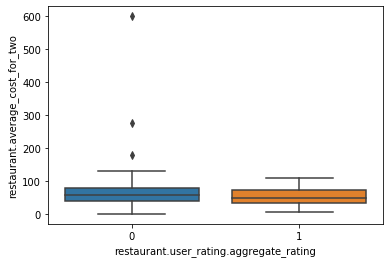

In [40]:
#Since averge cost is numerical value, let's check the impact on the ratings.
sns.boxplot(x=clean_df["restaurant.user_rating.aggregate_rating"], y=clean_df["restaurant.average_cost_for_two"],orient="v")

There is few impact by the cost.

## Next, let's build the model.

Since our target is categorical value, We will explore:

1. Naive Bayes
2. Logistic Regression
3. Support Vector Classifier (SVC)
4. K-Nearest Neighbor classifier (KNN classifier)
5. Decision Tree
6. Random Forest

In [126]:
# Specify model inputs
X = clean_df.drop(columns=["restaurant.user_rating.aggregate_rating"])
y = clean_df['restaurant.user_rating.aggregate_rating']

# Verify shapes align
print(X.shape)
print(y.shape)

(100, 53)
(100,)


In [132]:
# X.columns
# type(y)
X.as_matrix()

pandas.core.series.Series

Before moving on, we will fix the class imbalance.
### Random Oversampling Imbalanced Datasets

In [133]:
# import skills for random oversampling to balance the class distribution and to evaluate it
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# # define dataset
# X, y = make_classification(n_samples=1000, weights=[0.50], flip_y=0)
# # summarize class distribution
# print(Counter(y))
# define oversampling strategy
X=X.as_matrix()
oversample = SMOTE()
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 76, 0: 76})


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [134]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.623


array([[ 1.28061516e+00,  1.63866575e-01,  4.73555045e-01, ...,
        -1.02537243e+00, -8.04177044e-02,  1.05467635e-01],
       [-1.01611113e-01,  7.11418115e-01,  1.21560059e+00, ...,
        -1.02777681e-03, -8.44779044e-01,  1.55192930e-02],
       [ 5.38253835e-01, -2.78842830e-01, -1.80465627e-01, ...,
         2.95211929e-01, -7.94485182e-01, -4.56036060e-02],
       ...,
       [ 1.47260265e-01, -1.96360059e+00,  6.88755605e-02, ...,
        -4.03226615e-01, -1.02324171e+00,  1.34306788e+00],
       [-9.53680973e-01,  1.08900687e+00, -1.89604033e+00, ...,
        -6.59368460e-01,  4.06017542e-01, -1.58079052e+00],
       [ 8.40239393e-01, -4.84785533e-02,  7.64832872e-01, ...,
         1.45320099e-01,  1.41572769e+00, -1.27572804e+00]])

In [135]:
# # Import train/test/split
# from sklearn.model_selection import train_test_split

# #Split data, set test size to 30%
# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     y,
#     test_size=0.3,
#     random_state=20)

# #examine shape of data sets
# print("Training size:", X_train.shape, y_train.shape)
# print("Test size:", X_test.shape, y_test.shape)

# #Varify class balance in train/test sets
# print(y_train.value_counts())
# print(y_test.value_counts())

Training size: (70, 53) (70,)
Test size: (30, 53) (30,)
0    54
1    16
Name: restaurant.user_rating.aggregate_rating, dtype: int64
0    22
1     8
Name: restaurant.user_rating.aggregate_rating, dtype: int64


In [43]:
# Import some other performance metrics we'll use later on
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Naive Bayes

In [137]:
from sklearn.naive_bayes import BernoulliNB

#Create instance
bnb = BernoulliNB()

# #Fit training data
# bnb.fit(X, y)

# #Predict with training set
# y_pred_train = bnb.predict(X)

# #Predict with test set
# y_pred_test = bnb.predict(X_test)

# #Get accuracy scores, 
# print("NB training accuracy score:", round(accuracy_score(y_pred_train, y_train),3))
# print("NB test accuracy score:", round(accuracy_score(y_pred_test, y_test),3))

Training accuracy is 82.9%, test accuracy is 73.3%. The model is a little bit overfitted, but the performance is not so good.

In [138]:
from sklearn.model_selection import cross_validate

In [148]:
cv_results = cross_validate(bnb, X, y, cv=3, scoring="f1")
print(cv_results)

{'fit_time': array([0.00233126, 0.00098825, 0.00364804]), 'score_time': array([0.00142694, 0.00129485, 0.0022428 ]), 'test_score': array([0.36363636, 0.        , 0.54545455])}


In [146]:
y_pred = bnb.fit(X_over, y_over).predict(X_over)

# # Classification metrics
print('Precision/Recall training data: \n', classification_report(y_over, y_pred))

Precision/Recall training data: 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        76
           1       0.86      0.91      0.88        76

    accuracy                           0.88       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.88      0.88      0.88       152



In [147]:
# #Confusion matrix training data
# print("Confusion matrix training data: \n", confusion_matrix(y_train, y_pred_train), "\n")
y_pred = bnb.fit(X, y).predict(X)

# # Classification metrics
print('Precision/Recall training data: \n', classification_report(y, y_pred))


Precision/Recall training data: 
               precision    recall  f1-score   support

           0       0.81      0.97      0.89        76
           1       0.78      0.29      0.42        24

    accuracy                           0.81       100
   macro avg       0.80      0.63      0.66       100
weighted avg       0.80      0.81      0.78       100



From left to right, top to bottom, the confusion matrix gives the breakdown of true negatives (TN), false positives (FP), false negatives(FN), and true positives(TP).

The classification report gives us precision, recall, and f-1 scores.

Precision is a measurement of the true positives relative to the total number of predicted positive values(0/4), or conversely, the number of true negatives relative to the total numer of predicted negative values(54/66).

Recall (or sensitivity) is a measurement of the true positives relative to the total number of actual positive values(4/16), or conversely, the number of true negatives relative to the total number of actual negative values(54/54).

The F1 score combines precision and recall, providing the harmonic mean.

In [100]:
# define pipeline
steps = [('over', RandomOverSampler()), ('model', bnb)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.882


## Logistic Regression

In [109]:
#Import model
from sklearn.linear_model import LogisticRegression

#Instantiate and set regularization coefficient to large value
lr = LogisticRegression(C=1e10)

#Fit model
fit = lr.fit(X_train, y_train)

print("Logistic regression training accuracy score:", round(lr.score(X_train, y_train), 3))
print("Logistic regression test accuracy score:", round(lr.score(X_test, y_test),3))

#Get coefficients, flatten, and send to list
coef_list=lr.coef_.ravel().tolist()

#Create new data frame with coefficients
coef=pd.DataFrame(data=coef_list, columns=["coef"])

#Add in variable names
coef["variable"] = list (X)

#sort by coefficient value
sorted_coef = coef.sort_values("coef", ascending=False)

#Plot
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_coef["variable"], y=sorted_coef["coef"],color="teal")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.title("Logistic Regression Coefficients")

plt.show()

Logistic regression training accuracy score: 0.864
Logistic regression test accuracy score: 0.86


ValueError: Length of values does not match length of index

Logistic regression performed better than Naive Bayes but was very overfitted. Here's what we see:

- Training accuracy was 95.7%
- Test accuracy was 53.3%
- Fastfood and Avondale had the strongest positive correlations
- Streetville and Fine Dining had the strongest negative correlations


Now let's look at regularization methods to see if we can improve the perfomance of our logistic regression. We'll automate the hyperparameter selection process by using grid search to select the best regularization method and coefficient.

In [110]:
from sklearn.model_selection import GridSearchCV

#Create a new instance for regularization
lr_reg = LogisticRegression()

#Specify regularization penalties
#l1=Lasso, l2 = Ridge
penalty = ["l1", "l2"]

#Specify regularrization hyperparameter range
C=np.logspace(3,11,5)

#set hyperparameters
hyperparameters=dict(
    C=C, 
    penalty=penalty
)

#create grid search using 5-fold cross validation
clf = GridSearchCV(lr_reg, hyperparameters, cv=5)

#Run grid search => whole data
results = clf.fit(X, y)

print('Best Penality:', results.best_estimator_.get_params()['penalty'])
print('Best C:', results.best_estimator_.get_params()['C'])
print('Best score:', round(results.best_score_, 3))

Best Penality: l2
Best C: 1000.0
Best score: 0.86


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_v

In [111]:
## cross validation
# Get hyperparameters from above 
best_lr = LogisticRegression(
    C=1000.0,
    penalty="l2")

#Fit model
best_lr.fit(X_train, y_train)

print("Logistic regression training accuracy score:", round(best_lr.score(X_train, y_train), 3))
print("Logistic regression test accuracy score:", round(best_lr.score(X_test, y_test),3))

#Get coefficients, flatten, and send to list
coef_list=best_lr.coef_.ravel().tolist()

#Create new data frame with coefficients
coef=pd.DataFrame(data=coef_list, columns=["coef"])

#Add in variable names
coef["variable"] = list (X)

#sort by coefficient value
sorted_coef = coef.sort_values("coef", ascending=False)

#Plot
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_coef["variable"], y=sorted_coef["coef"],color="teal")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.title("Logistic Regression Coefficients")

plt.show()

Logistic regression training accuracy score: 0.864
Logistic regression test accuracy score: 0.86


ValueError: Length of values does not match length of index

Training accuracy was 95.7%, didn't improved from the previous one.
Test accuracy was 53.3%, didn't improved from the previous one

## SVC (Support Vector Classifier)

In [112]:
from sklearn.svm import SVC

#create instance, set criterion to entropy
svc = SVC()

#specify hyperparameter range
C = np.arange(0.1, 2.0, 1)
kernel= ["linear", "rbf"]
gamma = np.arange(0.1, 2.0, 1)

#set hyperparameters
hyperparameters = dict(
    C=C, 
    kernel=kernel,
    gamma=gamma)

# Create grid search using 5-fold cross validation
clf=GridSearchCV(svc, hyperparameters, cv=5)

#Run grid search
results=clf.fit(X_train, y_train)

print("C: ", results.best_estimator_.get_params()["C"])
print("kernel:" , results.best_estimator_.get_params()["kernel"])
print("gamma: ", results.best_estimator_.get_params()["gamma"])
print("Best score: ", round(results.best_score_,3))


C:  1.1
kernel: linear
gamma:  0.1
Best score:  0.85


In [113]:
#F1 score, num classification report

best_svc = SVC(
    C=1.1, 
    kernel="linear",
    gamma=0.1)

best_svc.fit(X_train, y_train)

print("SVC training score: ", round(best_svc.score(X_train, y_train),3))
print("SVC test score: ", round(best_svc.score(X_test, y_test),3))

SVC training score:  0.866
SVC test score:  0.86


The model performs decently. But, it is a little bit overfitting.

 - Training accuracy was 88.6%
 - Test accuracy was 70.0%

## KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier

#create instance, set criterion to entropy
knn = KNeighborsClassifier()

#specify hyperparameter range
n_neighbors = np.arange(1, 10, 1)
weights = ["uniform", "distance"]

#set hyperparameters
hyperparameters = dict(
    n_neighbors = n_neighbors, 
    weights=weights
)

# Create grid search using 5-fold cross validation
clf=GridSearchCV(knn, hyperparameters, cv=5)

#Run grid search
results=clf.fit(X_train, y_train)

print("n neighbors: ", results.best_estimator_.get_params()["n_neighbors"])
print("weight:" , results.best_estimator_.get_params()["weights"])
print("Best score: ", round(results.best_score_,3))

n neighbors:  7
weight: uniform
Best score:  0.813


In [115]:
best_knn = KNeighborsClassifier(
    n_neighbors=2,
    weights="uniform"
)

best_knn.fit(X_train, y_train)

print("KNN training score: ", round(best_knn.score(X_train, y_train),3))
print("KNN test score: ", round(best_knn.score(X_test, y_test),3))

KNN training score:  0.864
KNN test score:  0.73


It is less overfit than the other models, and the score is not bad.

- Training accuracy: 81.4%
- Test accuracy: 76.7%

## Decision tree

In [116]:
# Import model
from sklearn import tree

# Import relevant libraries
from IPython.display import Image
from sklearn import tree

# Import package for rendering tree
import pydotplus
from pydotplus import graphviz

In [117]:
#let's check best max depth and max features using a grid search for hyperparameter selection
#create instance, set criterion to entropy
decision_tree = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=17)

#specify hyperparameter range
max_depth = np.arange(2, 10, 1)
max_features = np.arange(2, 12, 1)

#set hyperparameters
hyperparameters = dict(
    max_depth=max_depth, 
    max_features=max_features)

# Create grid search using 5-fold cross validation
clf=GridSearchCV(decision_tree, hyperparameters, cv=5)

#Run grid search
results=clf.fit(X_train, y_train)

print("Max depth: ", results.best_estimator_.get_params()["max_depth"])
print("Max features: ", results.best_estimator_.get_params()["max_features"])
print("Best score: ", round(results.best_score_,3))

Max depth:  5
Max features:  9
Best score:  0.876


In [118]:
#Create model
best_decision_tree= tree.DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=5, 
    max_features=6,
    random_state=17)

#Create model
best_decision_tree.fit(X_train, y_train)

print('Decision tree training accuracy: ', round(best_decision_tree.score(X_train, y_train), 3))
print('Decision tree test accuracy: ', round(best_decision_tree.score(X_test, y_test), 3))

#create tree graphic
dot_data = tree.export_graphviz(best_decision_tree, out_file=None, feature_names=X.columns, class_names=["0","1"],filled=True)

graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Decision tree training accuracy:  0.851
Decision tree test accuracy:  0.79


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [119]:
# Feature importance

# create new df to store features
best_tree_features = pd.DataFrame()
best_tree_features["importance"] = best_decision_tree.feature_importances_
best_tree_features["features"] = X.columns

#Sort descending
sorted_tree = best_tree_features.sort_values("importance", ascending=False)

#plot
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_tree["features"], y=sorted_tree["importance"], color="teal")
plt.title("Decision Tree Feature Importance")
plt.xticks(rotation=90)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

It is overfit as expected.

Here is what we learned from decision tree:

- Training accuracy was 84.3%
- Test accuracy was 70.0%
- Fast Food is the most important feature


Let's fix the overfitting by reducing max_depth.

In [120]:
#Create model
best_decision_tree= tree.DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=2, 
    max_features=6,
    random_state=17)

#Create model
best_decision_tree.fit(X_train, y_train)

print('Decision tree training accuracy: ', round(best_decision_tree.score(X_train, y_train), 3))
print('Decision tree test accuracy: ', round(best_decision_tree.score(X_test, y_test), 3))

#create tree graphic
dot_data = tree.export_graphviz(best_decision_tree, out_file=None, feature_names=X.columns, class_names=["0","1"],filled=True)

graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Decision tree training accuracy:  0.81
Decision tree test accuracy:  0.81


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

It is less overfitting now. But, as a side effect, the accuracy reduced.

## Random Forest

In [121]:

#This took too much time. Be careful before running this.
from sklearn import ensemble

#Create instance. Set # features to sqrt to total
forest = ensemble.RandomForestClassifier(
    random_state=17,
    max_features="sqrt"
)

#Specify hyperparameter range
criterion = ["entropy", "gini"]
n_estimators = np.arange(200, 300, 10)
max_depth = np.arange (8, 15, 1)

#set hyperparameters
hyperparameters=dict(
    criterion=criterion,
    n_estimators=n_estimators, 
    max_depth=max_depth)

#Create grid search using 5-fold cross validation
clf=GridSearchCV(forest, hyperparameters, cv=5)

#Run grid search
results = clf.fit(X_train, y_train)

print("Criterion: ", results.best_estimator_.get_params()["criterion"])
print("n estimators: ", results.best_estimator_.get_params()["n_estimators"])
print("Max depth: ", results.best_estimator_.get_params()["max_depth"])
print("Best score: ", round(results.best_score_,3))

Criterion:  gini
n estimators:  250
Max depth:  13
Best score:  0.9


In [ ]:
forest = ensemble.RandomForestClassifier(
    criterion="entropy",
    n_estimators=200,
    max_depth=8
)

forest.fit(X_train, y_train)

print("Forest training score: ", round(forest.score(X_train, y_train),3))
print("Forest test score: ", round(forest.score(X_test, y_test),3))

In [ ]:
forest_features = pd.DataFrame()
forest_features["importance"] = forest.feature_importances_
forest_features["features"] = X.columns
sorted_forest = forest_features.sort_values("importance", ascending=False)

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_forest["features"], y=sorted_forest["importance"], color="teal")
plt.xticks(rotation=90)
plt.title("Random Forest")

It improved score compared to single decision tree. But it is very overfitting.

- Training accuracy was 91.4%
- Test accuracy was 76.7%
- Cost was the most important feature


Let's fix the overfitting by reducing max_depth.

In [ ]:
forest = ensemble.RandomForestClassifier(
    criterion="entropy",
    n_estimators=200,
    max_depth=2
)

forest.fit(X_train, y_train)

print("Forest training score: ", round(forest.score(X_train, y_train),3))
print("Forest test score: ", round(forest.score(X_test, y_test),3))

Now, it is less overfitting. As a side effect, the accuracy reduced a lot.

## Conclusions for the supervised learning

We've built a classifier to predict whether or not the wine is good based on features. 

We explored:

- Naive Bayes (test score: 73.3%)
- Logistic Regression(test score: 53.3%)
- Support Vector Classifier (test score: 70.0%)
- K-Nearest Neighbor classifier (test score: 76.7%)
- Decision Tree(test score: 73.0%)
- Random Forest(test score: 73.3%)


Overall, model accuracy ranged from 53 ~ 77%. The best performing model was KNN.

Based on the other models, it seems like establishment type and the  location are important features. (For example, Fastfood and Avondale.)

In [ ]:
def generateBaseMap(default_location=[41.87, 87.62], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [ ]:
new_df['restaurant.location.zipcode']

lat,lon=zip(*np.array(new_df['restaurant.location.zipcode']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)